# Andree Hoang's Work Sample: Online Sales Analysis (Exploratory Analysis/CRM Cohort Analysis)

<b>Data Source:</b> Kraggle's open source Online Retail Dataset - https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-datasethttps://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset

<b>Content</b>
1. Business Problem
2. Data Inspection
3. Data Preparation
4. Data Analysis I: KPI analysis for each Country
5. Data Analysis II: Understand seasonality impact on Online business
6. Conclusion

# Business Problem

* The business aims to gain insights into the influence of different seasons on customer value, average order value, and purchase frequency in order to allocate marketing spend and resources effectively. 
* To address this inquiry, I will begin by conducting an exploratory analysis to determine the geographical distribution of our online customers and assess the performance of each country in relation to the average key performance indicators (KPIs). 
* Subsequently, I will segment customer performance by month throughout the year to evaluate the seasonal impact on the online business.

# Data Understanding

## Import Packages and Data

In [262]:
# import packages
import pandas as pd
import numpy as np
import csv

# visualization
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [263]:
# import data
data = pd.read_csv('/Users/andreehoang/Desktop/Data Science Datasets/online_retail.csv')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.650,17850.000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.250,17850.000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.850,17850.000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.850,17850.000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.690,13047.000,United Kingdom


In [268]:
# Get info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


<b>NOTE:</b> This datatable has Null value for CustomerID. In order to accurately access KPIs such as Customer Value or Frequency, these line items will need to be excluded.

## NULL Values

In [287]:
# Check for all NULL values
print('NULL CustomerID Value')
print(data.isnull().sum())

print('===NULL CustomerID per Country===')
# Check for Null CustomerID value in each Country
nan = data[data['CustomerID'].isna()].groupby('Country').size()
nan_sorted = nan.sort_values(ascending=False)
print(nan_sorted)

NULL CustomerID Value
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
===NULL CustomerID per Country===
Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
dtype: int64


## Total Item Sold & Quantity

In [276]:
# Quantity sold per item
print(data.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head())

# Number of unique items
print("Number of unique items sold:", data['Description'].nunique())

                                   Quantity
Description                                
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
Number of unique items sold: 4223


## Date Range

In [277]:
# Get the date range of the dataset.
start_date = data['InvoiceDate'].min()
end_date = data['InvoiceDate'].max()
print('Date Range', start_date, 'to', end_date)

# Total invoice generated during this time
total_invoice = data['InvoiceNo'].nunique()
print('Total eCom Invoice:', total_invoice)

Date Range 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Total eCom Invoice: 25900


## Duplicates

In [288]:
# check for any duplicated rows
is_unique = data.duplicated().any()
print("All rows are unique:", is_unique)

All rows are unique: True


## Invoice Type (Sales/Return/Exchange)

In [298]:
# there are two records with null value for CustomerID and negative UnitPrice amount. Exclude these lines items since they seem to be an outlier for this datatable with 'Adjust Bad Credit' as Description
return_items = data[data['UnitPrice'] < 0]
print('Numner of returned items:', len(return_items))

exchanged_items = data[data['UnitPrice'] == 0] # this could be a combination of exchanged or coupon applied
print('Number of items with $0 UnitPrice:', len(exchanged_items))

Numner of returned items: 2
Number of items with $0 UnitPrice: 2515


<b>NOTE:</b> The dataset contains one year's worth of online sales data, with 25,900 unique invoices generated during that time.

# Data Preparation

* Remove Null CustomerID records in order to accurately access KPIs such as Customer Value and Purchase Frequency
* Exclude the two ourlier invoices with negative UnitPrice value. This dataset should only be comprised on sales line item (Demand).
* Exclude country value "Unspecified"

## Remove Outliers & Bad Data

In [301]:
# drop rows with NULL customerID
cleaned_data = data.dropna(subset=['CustomerID']) # this part will also drop the two "return" invoices

# drop rows with 'Unspecified' Country
cleaned_data = cleaned_data[cleaned_data['Country'] != 'Unspecified']
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406585 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406585 non-null  object 
 1   StockCode    406585 non-null  object 
 2   Description  406585 non-null  object 
 3   Quantity     406585 non-null  int64  
 4   InvoiceDate  406585 non-null  object 
 5   UnitPrice    406585 non-null  float64
 6   CustomerID   406585 non-null  float64
 7   Country      406585 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [304]:
print('This process excluded', len(data) - len(cleaned_data), 'records with NULL CustomerID and Unspecified Country name.')

This process excluded 135324 records with NULL CustomerID and Unspecified Country name.


In [235]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Add Total Price Column

In [324]:
# Get total price per line item
cleaned_data['Total Price'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


# Data Analysis I: Understanding which Country is driving KPIs

* How does each country performed in terms of sales, Customer Value, AOV, and Frequency vs. the overall average
* Which country is driving the most sales for the business

## Calculate Customer Value, AOV, and Purchase Frequency per Country

* <b>Customer Value:</b> a metric used in business to estimate the total net profit generated by a customer over their entire relationship with a company. For this particular use case, it is measured within a 12-month lifespan.helps businesses assess the profitability of acquiring and retaining customers, as well as make informed decisions regarding customer acquisition costs and marketing strategies. By understanding the lifetime value of customers, businesses can prioritize resources, personalize customer experiences, and implement strategies to maximize customer loyalty and profitability.
* <b>AOV:</b> also known as "Average Order Value". It is a metric used in retail and e-commerce that calculates the average value of each order placed by customers, providing insights into their purchasing behavior and the overall revenue generated per transaction
* <b>Frequency:</b> is typically calculated by dividing the total number of purchases made by a customer by the total number of unique time periods or visits during a given period. This metric is valuable for understanding customer behavior, loyalty, and engagement with a business. Higher purchase frequency often indicates a more loyal and active customer base, while lower purchase frequency may suggest a need for strategies to increase customer engagement and retention.

In [325]:
# Summarize online purchases by coutry and product description
summary = cleaned_data.groupby('Country')[['CustomerID', 'InvoiceNo']].nunique().reset_index()
#summary_sorted = summary.sort_values('InvoiceNo', ascending=False)

# Get sales amount
## calculate total revenue per row
cleaned_data_copy = cleaned_data.copy()
rev_per_country = cleaned_data_copy.groupby('Country')['Total Price'].sum().reset_index()

## add total sales amount to the summary table
summary_table = pd.merge(summary, rev_per_country, on='Country')
summary_table = summary_table.sort_values('InvoiceNo', ascending=False)

# Calculate Average Order Value, Average Frequecy, and Customer Value per Country
summary_table['AOV'] = summary_table['Total Price'] / summary_table['InvoiceNo']
summary_table['Orders per Customer'] = summary_table['InvoiceNo'] / summary_table['CustomerID'] 
summary_table['Customer Value'] = summary_table['Total Price'] / summary_table['CustomerID']

# Rounding
summary_table['Total Price'] = summary_table['Total Price'].round(0).astype(int)
summary_table['AOV'] = summary_table['AOV'].round(0).astype(int)
summary_table['Orders per Customer'] = summary_table['Orders per Customer'].round(2)
summary_table['Customer Value'] = summary_table['Customer Value'].round(0).astype(int)
summary = summary_table.reset_index()

In [326]:
print(summary.info())
summary = summary.sort_values('Total Price', ascending=False)
summary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                36 non-null     int64  
 1   Country              36 non-null     object 
 2   CustomerID           36 non-null     int64  
 3   InvoiceNo            36 non-null     int64  
 4   Total Price          36 non-null     int64  
 5   AOV                  36 non-null     int64  
 6   Orders per Customer  36 non-null     float64
 7   Customer Value       36 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.4+ KB
None


,index,Country,CustomerID,InvoiceNo,Total Price,AOV,Orders per Customer,Customer Value
0,35,United Kingdom,3950,19857,6767873,341,5.030,1713
6,23,Netherlands,9,101,284662,2818,11.220,31629
3,10,EIRE,3,319,250285,785,106.330,83428
1,14,Germany,95,603,221698,368,6.350,2334
2,13,France,87,458,196713,430,5.260,2261


## Calculate Overall KPI Average

In [327]:
# Calculate the average values
average_aov = summary['AOV'].mean()
average_orders_per_customer = summary['Orders per Customer'].mean()
average_customer_value = summary['Customer Value'].mean()

## BAR CHART: How does each Country's KPIs compare to the overall average?

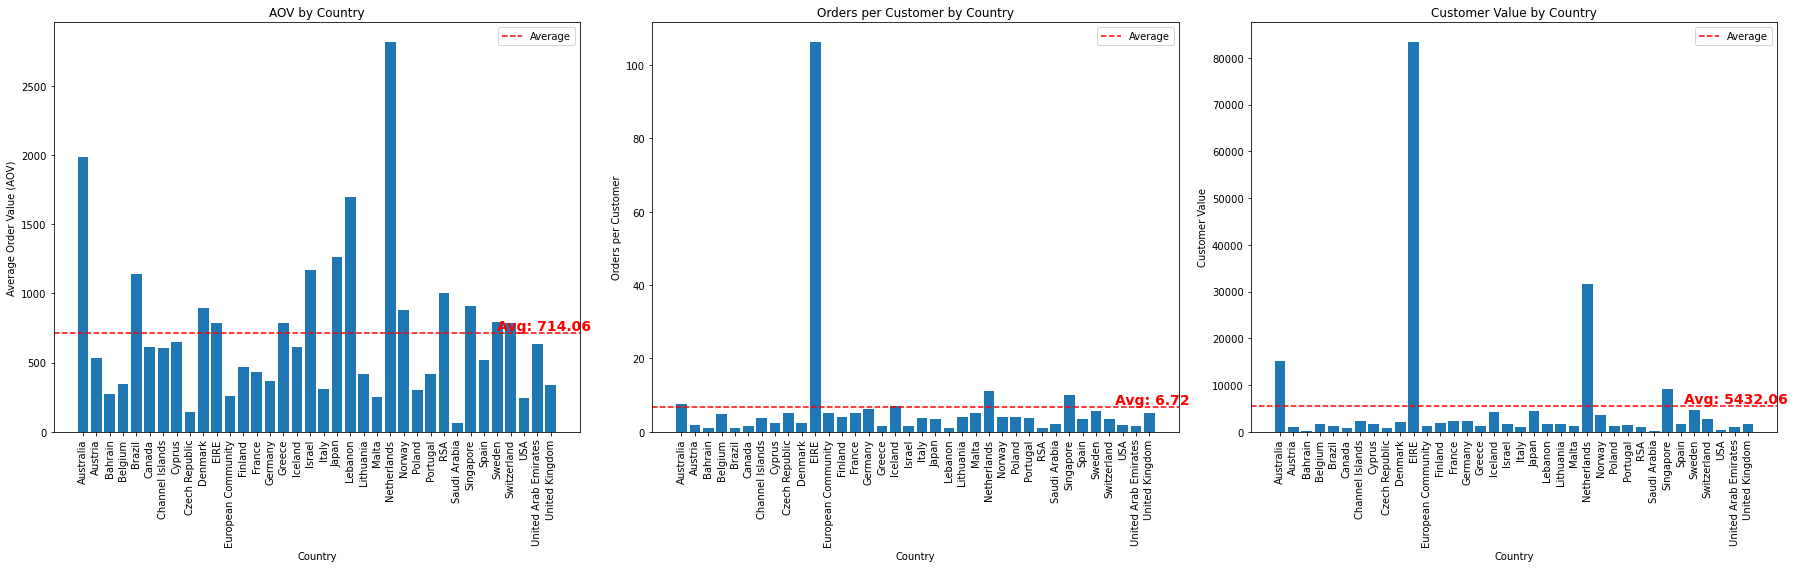

In [328]:
# Sort the data by 'Country' column
summary = summary.sort_values('Country')

# Create subplots for side by side plots
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Plot for Average Order Value (AOV)
axs[0].bar(summary['Country'], summary['AOV'])
axs[0].axhline(average_aov, color='red', linestyle='--', label='Average')
axs[0].text(38, average_aov, f"Avg: {average_aov:.2f}", ha='right', va='bottom', fontweight='bold', color='red', fontsize='14')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Order Value (AOV)')
axs[0].set_title('AOV by Country')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()

# Plot for Orders per Customer
axs[1].bar(summary['Country'], summary['Orders per Customer'])
axs[1].axhline(average_orders_per_customer, color='red', linestyle='--', label='Average')
axs[1].text(38, average_orders_per_customer, f"Avg: {average_orders_per_customer:.2f}", ha='right', va='bottom', fontweight='bold', color='red', fontsize='14')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Orders per Customer')
axs[1].set_title('Orders per Customer by Country')
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend()

# Plot for Customer Value
axs[2].bar(summary['Country'], summary['Customer Value'])
axs[2].axhline(average_customer_value, color='red', linestyle='--', label='Average')
axs[2].text(38, average_customer_value, f"Avg: {average_customer_value:.2f}", ha='right', va='bottom', fontweight='bold', color='red', fontsize='14')
axs[2].set_xlabel('Country')
axs[2].set_ylabel('Customer Value')
axs[2].set_title('Customer Value by Country')
axs[2].tick_params(axis='x', rotation=90)
axs[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<b>NOTE:</b> The presence of a small number of customers with high monetary value from Ireland (EIRE), Australia, Netherlands, and Singapore is distorting the overall averages for each key performance indicator (KPI). These customers, potentially considered as outliers, exhibit a tendency to place bulk orders.

## Calculate KPI Variance to the Overall Averages

In [329]:
# Calculate KPI variance to average for each country
variance_table = summary.copy()
variance_table['AOV % Variance'] = ((summary['AOV'] - average_aov) / average_aov) * 100
variance_table['Orders per Customer % Variance'] = ((summary['Orders per Customer'] - average_orders_per_customer) / average_orders_per_customer) * 100
variance_table['Customer Value % Variance'] = ((summary['Customer Value'] - average_customer_value) / average_customer_value) * 100

# Round to zero decimal point
variance_table['AOV % Variance'] = variance_table['AOV % Variance'].round(0).astype(int)
variance_table['Orders per Customer % Variance'] = variance_table['Orders per Customer % Variance'].round(0).astype(int)
variance_table['Customer Value % Variance'] = variance_table['Customer Value % Variance'].round(0).astype(int)

variance_table = variance_table.sort_values('Country', ascending=False)
variance_table.head()

,index,Country,CustomerID,InvoiceNo,Total Price,AOV,Orders per Customer,Customer Value,AOV % Variance,Orders per Customer % Variance,Customer Value % Variance
0,35,United Kingdom,3950,19857,6767873,341,5.030,1713,-52,-25,-68
30,34,United Arab Emirates,2,3,1902,634,1.500,951,-11,-78,-82
22,33,USA,4,7,1731,247,1.750,433,-65,-74,-92
7,32,Switzerland,21,71,55739,785,3.380,2654,10,-50,-51
12,31,Sweden,8,46,36596,796,5.750,4574,11,-14,-16


## SCATTER PLOT: How does each Country's KPIs performed, in % Var, to the overall averages

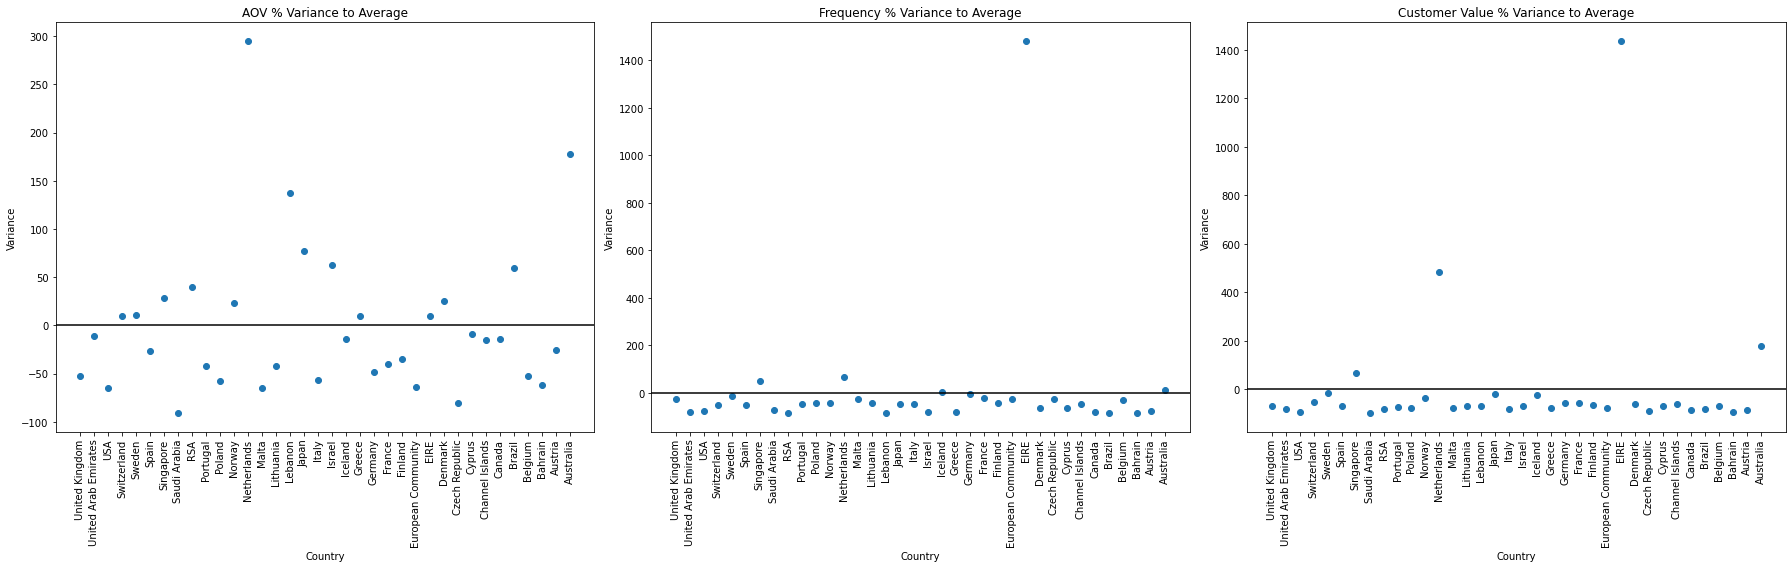

In [330]:
# Create subplots for side by side plots
fig, axis = plt.subplots(1, 3, figsize=(25, 8))

# Plot AOV variance
axis[0].scatter(variance_table['Country'], variance_table['AOV % Variance'])
axis[0].axhline(y=0, color='black', linestyle='-')
axis[0].set_xlabel('Country')
axis[0].set_ylabel('Variance')
axis[0].set_title('AOV % Variance to Average')
axis[0].tick_params(axis='x', rotation=90)

# Plot Orders/Cust variance
axis[1].scatter(variance_table['Country'], variance_table['Orders per Customer % Variance'])
axis[1].axhline(y=0, color='black', linestyle='-')
axis[1].set_xlabel('Country')
axis[1].set_ylabel('Variance')
axis[1].set_title('Frequency % Variance to Average')
axis[1].tick_params(axis='x', rotation=90)

# Plot Customer Value variance
axis[2].scatter(variance_table['Country'], variance_table['Customer Value % Variance'])
axis[2].axhline(y=0, color='black', linestyle='-')
axis[2].set_xlabel('Country')
axis[2].set_ylabel('Variance')
axis[2].set_title('Customer Value % Variance to Average')
axis[2].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Analysis I Conclusions

* The United Kingdom accounts for 90.7% of the total revenue during this period, with an Average Order Value (AOV) of 431 dollar, which is 52% below the average.
* The Purchase Frequency in the United Kingdom is 5.03, which is 25% below the average, while the Customer Value is 1317 dollar, showing a 68% below-average value.
* However, the presence of a small number of customers with high monetary value from Ireland (EIRE), Australia, Netherlands, and Singapore is distorting the overall averages for each key performance indicator (KPI). These customers, potentially considered as outliers, exhibit a tendency to place bulk orders.
* Since the United Kingdom constitutes the majority of this dataset, the next step is to assess its monthly performance to gain insights into the online sales performance during each season.

# Data Analysis II: Understand seasonality impact on Online business

* This analysis segment enables us to assess the performance of e-commerce on a monthly basis, focusing on the UK market, which accounts for 90.7% of e-commerce sales.
* By segmenting customer performance on a monthly basis throughout the year, we can evaluate the influence of seasons on the online business.

In [331]:
# create a dataframe just for UK
uk = cleaned_data[cleaned_data['Country'] == 'United Kingdom']
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [332]:
# Add month number and month name based on InvoiceDate
## convert InvoiceDate to datetime format
uk_data = uk.copy()
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

# Extract the month number and month name
uk_data['Month Number'] = uk_data['InvoiceDate'].dt.month
uk_data['Month Name'] = uk_data['InvoiceDate'].dt.strftime('%B')
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month Number,Month Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,12,December


In [338]:
# Calculate UK's KPIs by month
month_perf = uk_data.groupby(['Month Number', 'Month Name']).agg({
    'Total Price': 'nunique',
    'CustomerID': 'nunique',
    'UnitPrice': 'sum'
}).reset_index()

# Rename the columns
month_perf.columns = ['Month Number', 'Month Name', 'Orders', 'Customers', 'Revenue']


# Calculate Customer Value, AOV, and Frequency
month_perf['Customer Value'] = (month_perf['Revenue'] / month_perf['Customers']).round(0).astype(int) # customer value
month_perf['AOV'] = (month_perf['Revenue'] / month_perf['Orders']).round(0).astype(int) # AOV
month_perf['Frequency'] = (month_perf['Orders'] / month_perf['Customers']).round(2) # frequency

month_perf

,Month Number,Month Name,Orders,Customers,Revenue,Customer Value,AOV,Frequency
0,1,January,929,684,59147.990,86,64,1.360
1,2,February,830,714,58477.730,82,70,1.160
2,3,March,970,923,75679.330,82,78,1.050
3,4,April,1009,817,68934.191,84,68,1.240
4,5,May,1086,985,105981.950,108,98,1.100
5,6,June,1158,943,116177.650,123,100,1.230
6,7,July,1132,899,80179.991,89,71,1.260
7,8,August,1126,867,72279.140,83,64,1.300
8,9,September,1431,1177,109980.822,93,77,1.220
9,10,October,1642,1285,138296.840,108,84,1.280


# LINE CHART: How does UK perform in each month?

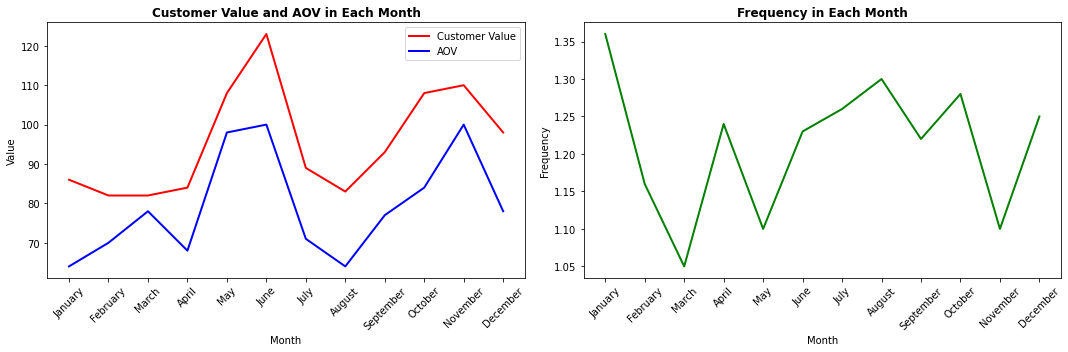

In [362]:
# Create subplots with a 1x2 grid layout
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for AOV and Customer Value
axs[0].plot(month_perf['Month Name'], month_perf['Customer Value'], color='red', linewidth=2, label='Customer Value')
axs[0].plot(month_perf['Month Name'], month_perf['AOV'], color='blue', linewidth=2, label='AOV')
axs[0].set_title('Customer Value and AOV in Each Month', fontweight='bold')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Value')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

# Plot for Frequency
axs[1].plot(month_perf['Month Name'], month_perf['Frequency'], color='green', linewidth=2)
axs[1].set_title('Frequency in Each Month', fontweight='bold')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

The Average Order Value (AOV) and Customer Value peaked in June, and they began trending higher again from September to November. The company specializes in selling unique all-occasion gifts, and it appears that customers are purchasing more during the summer and fall seasons. However, the KPIs seems to be relatively lower during the winter and spring seasons.

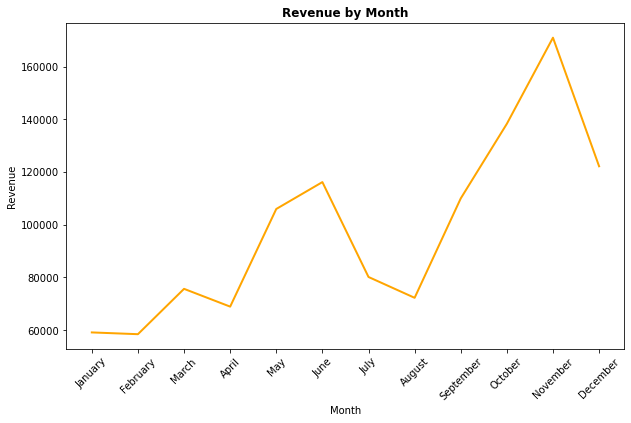

In [366]:
# Create a plot for Revenue
plt.figure(figsize=(10, 6))
plt.plot(month_perf['Month Name'], month_perf['Revenue'], color='orange', linewidth=2)
plt.title('Revenue by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

# Display the plot
plt.show()

During the fall season, there is a high demand for products, but on average, customers tend to spend less per order compared to the summer months. However, there is an increase in the number of customers making purchases during the fall, which contributes to the higher overall demand. For wholesalers, this implies that October and November are crucial periods for restocking inventory. Therefore, the business should ensure an adequate supply to meet the increased demand during these two months.

## Analysis II Conclusions

* Ensuring sufficient supply during October and November is of utmost importance to meet market demand.
* The summer months, particularly from May to June, witness a surge in customer average spending per order, leading to increased demand.
* October and November attract a larger customer base, resulting in higher demand. However, customers tend to spend less per order compared to the summer months.